In [2]:
import dotenv
dotenv.load_dotenv()

from langchain_upstage import UpstageEmbeddings
q_embeddings = UpstageEmbeddings(
    model="solar-embedding-1-large"
)

In [3]:
import pandas as pd
import numpy as np
import os

path = "D:\\00. projects\\GAS5_CP\data\\"
file1 = "라벨링데이터원본_embed"

pd.set_option("display.max_column", 35)
data = pd.read_json(os.path.join(path, file1) + ".json")
data.head(0)

,number,title,name,date,answer_state,contents,has_attachment,answer_contents,charge,answer_date,registration_number,charge_name,title_and_contents,aggr,욕설_모욕,비꼼_시비,성희롱,요지불명,저격성 민원,완전중복,반복,출처,text,len_text,text_masked,text_morphed_masked,text_embedded,text_masked_embedded,text_morphed_masked_embedded,len_text_masked,len_text_morphed_masked


In [4]:
# insult = '''
# 욕설/모욕
# - 읽는 이에게 직접적인 모욕감을 주는 내용
# - 상대방을 모욕하거나 비하하는 언어적 공격을 포함할 수 있음
# '''
# sarcasm = '''
# 조롱/시비
# - 상대방을 조롱하거나 논쟁을 일으키는 내용
# - 상대방의 주장이나 행동에 대해 빈정대거나 비판하는 요소를 포함
# '''


In [51]:
aggresive = '''
"공격적인 언어, 모욕적인 표현, 상대방을 무시하거나 경멸하는 태도, 대립적인 상황이나 언쟁과 관련된 내용이 포함될 수 있습니다. 이는 욕설, 비속어, 과격한 표현, 위협 등을 포함할 수 있dma"
'''

insult = '''
욕설, 모욕, 비하, 혐오 발언, 언어폭력, 비속어, 인신공격, 비난, 공격적인 언행, 심한 표현, 부정적인 언어, 무례한 태도
'''
sarcasm = '''
"비꼼, 시비, 비하, 조롱, 설전, 논쟁, 논쟁적인 태도, 불만 표현, 비판적인 언어, 이견 제시, 논란을 일으키는 발언"
'''


In [52]:
aggresive_embed = q_embeddings.embed_query(text=aggresive)
insult_embed = q_embeddings.embed_query(text=insult)
sarcasm_embed = q_embeddings.embed_query(text=sarcasm)
text_embed = q_embeddings.embed_documents(texts=[aggresive,insult,sarcasm])


In [56]:
import numpy as np
aggresive_embed_1 = np.array(aggresive_embed)
aggresive_embed_2 = np.array(text_embed[0])
insult_embed_1 = np.array(insult_embed)
insult_embed_2 = np.array(text_embed[1])
sarcasm_embed_1 = np.array(sarcasm_embed)
sarcasm_embed_2 = np.array(text_embed[2])

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
pd.DataFrame(cosine_similarity([aggresive_embed_1, aggresive_embed_2,insult_embed_1,insult_embed_2,sarcasm_embed_1,sarcasm_embed_2]))

,0,1,2,3,4,5
0,1.000000,0.856965,0.777657,0.652690,0.660078,0.542261
1,0.856965,1.000000,0.627192,0.805257,0.517697,0.694632
2,0.777657,0.627192,1.000000,0.768479,0.667911,0.502465
3,0.652690,0.805257,0.768479,1.000000,0.503268,0.711927
4,0.660078,0.517697,0.667911,0.503268,1.000000,0.758558
5,0.542261,0.694632,0.502465,0.711927,0.758558,1.000000


In [180]:
target = 'aggr'

smaples = data[data[target]==1]

sample_vecs_1 = np.stack(smaples.text_embedded.values)
sample_vecs_2 = np.stack(smaples.text_masked_embedded.values)
sample_vecs_3 = np.stack(smaples.text_morphed_masked_embedded.values)

In [181]:
vectors = [sample_vecs_1, sample_vecs_2, sample_vecs_3]
embeds = [aggresive_embed_1, aggresive_embed_2, insult_embed_1, insult_embed_2, sarcasm_embed_1, sarcasm_embed_2]

for i, vec in enumerate(vectors):
    print(f'{target}_vec_{i} : ')
    for i, embed in enumerate(embeds):
        print(((vec * embed).sum(axis=1)).mean())
        

aggr_vec_0 : 
0.19586800779468833
0.2583102113038039
0.1694870621541483
0.26157618217547407
0.1666234499839374
0.24270296679033312
aggr_vec_1 : 
0.20883095571162247
0.27500817869027083
0.18076909754676757
0.277944857022461
0.17695678966834613
0.25895757218737614
aggr_vec_2 : 
0.19883749313883875
0.27312898618249265
0.17264904583684626
0.2770582717842873
0.1675715896740736
0.2580495264009126


In [182]:
target_cosims = pd.DataFrame()
for i, vec in enumerate(vectors):
    for j, embed in enumerate(embeds):
        target_cosims[f'cosim_text_{i}_cat_{j}'] = (vec * embed).sum(axis=1)
        

In [183]:
target_cosims[target] = 1

In [184]:
print(target_cosims.shape)
target_cosims.head(2)

(364, 19)


,cosim_text_0_cat_0,cosim_text_0_cat_1,cosim_text_0_cat_2,cosim_text_0_cat_3,cosim_text_0_cat_4,cosim_text_0_cat_5,cosim_text_1_cat_0,cosim_text_1_cat_1,cosim_text_1_cat_2,cosim_text_1_cat_3,cosim_text_1_cat_4,cosim_text_1_cat_5,cosim_text_2_cat_0,cosim_text_2_cat_1,cosim_text_2_cat_2,cosim_text_2_cat_3,cosim_text_2_cat_4,cosim_text_2_cat_5,aggr
0,0.199916,0.255301,0.178770,0.258068,0.157730,0.230451,0.201400,0.257348,0.184770,0.270400,0.157418,0.238836,0.212578,0.268996,0.193272,0.274092,0.161276,0.237190,1
1,0.256632,0.333090,0.198575,0.305406,0.190769,0.268620,0.241593,0.324748,0.191061,0.306817,0.181581,0.275542,0.260880,0.347146,0.208677,0.329733,0.198899,0.296311,1


In [185]:
counter_smaples = data[data[target]==0].sample(len(target_cosims), random_state=42)

counter_sample_vecs_1 = np.stack(counter_smaples.text_embedded.values)
counter_sample_vecs_2 = np.stack(counter_smaples.text_masked_embedded.values)
counter_sample_vecs_3 = np.stack(counter_smaples.text_morphed_masked_embedded.values)
vectors = [counter_sample_vecs_1, counter_sample_vecs_2, counter_sample_vecs_3]

In [186]:
counter_cosims = pd.DataFrame()
for i, vec in enumerate(vectors):
    for j, embed in enumerate(embeds):
        counter_cosims[f'cosim_text_{i}_cat_{j}'] = (vec * embed).sum(axis=1)
counter_cosims[target] = 0
print(counter_cosims.shape)
counter_cosims.head(2)

(364, 19)


,cosim_text_0_cat_0,cosim_text_0_cat_1,cosim_text_0_cat_2,cosim_text_0_cat_3,cosim_text_0_cat_4,cosim_text_0_cat_5,cosim_text_1_cat_0,cosim_text_1_cat_1,cosim_text_1_cat_2,cosim_text_1_cat_3,cosim_text_1_cat_4,cosim_text_1_cat_5,cosim_text_2_cat_0,cosim_text_2_cat_1,cosim_text_2_cat_2,cosim_text_2_cat_3,cosim_text_2_cat_4,cosim_text_2_cat_5,aggr
0,0.207384,0.258468,0.187956,0.277742,0.168120,0.229328,0.220144,0.269957,0.198753,0.285995,0.18218,0.236210,0.202286,0.257829,0.183135,0.275176,0.174282,0.235684,0
1,0.139471,0.238017,0.105684,0.244408,0.125442,0.260556,0.139004,0.254972,0.119481,0.281351,0.11874,0.273346,0.104018,0.224152,0.080764,0.246412,0.081187,0.240138,0


In [187]:
cosims = pd.concat([target_cosims, counter_cosims], ignore_index=True)
cosims.describe()

,cosim_text_0_cat_0,cosim_text_0_cat_1,cosim_text_0_cat_2,cosim_text_0_cat_3,cosim_text_0_cat_4,cosim_text_0_cat_5,cosim_text_1_cat_0,cosim_text_1_cat_1,cosim_text_1_cat_2,cosim_text_1_cat_3,cosim_text_1_cat_4,cosim_text_1_cat_5,cosim_text_2_cat_0,cosim_text_2_cat_1,cosim_text_2_cat_2,cosim_text_2_cat_3,cosim_text_2_cat_4,cosim_text_2_cat_5,aggr
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,0.184979,0.251445,0.156899,0.253895,0.155884,0.237545,0.198292,0.269717,0.168006,0.271593,0.166343,0.255148,0.188209,0.268240,0.160391,0.272188,0.157151,0.255433,0.500000
std,0.037792,0.030178,0.039277,0.031379,0.035858,0.029647,0.036967,0.030389,0.039059,0.031794,0.034941,0.030490,0.037847,0.030312,0.038784,0.029813,0.035602,0.030092,0.500344
min,0.040268,0.137646,0.007517,0.131757,0.029389,0.148587,0.080284,0.180799,0.028037,0.174507,0.029816,0.148430,0.064485,0.178356,0.023068,0.176912,0.034409,0.157090,0.000000
25%,0.160721,0.231221,0.131987,0.233570,0.132088,0.218180,0.175871,0.250522,0.142722,0.251625,0.144066,0.234898,0.162607,0.249734,0.136204,0.252260,0.134880,0.236132,0.000000
50%,0.185017,0.252508,0.157890,0.252928,0.156641,0.236919,0.198361,0.270084,0.167859,0.272538,0.168872,0.254706,0.189924,0.267281,0.162182,0.273205,0.159320,0.254712,0.500000
75%,0.208398,0.269711,0.180776,0.274641,0.178057,0.256768,0.222484,0.288526,0.193646,0.292303,0.189559,0.275045,0.211630,0.287619,0.184912,0.290361,0.181222,0.276036,1.000000
max,0.306812,0.387131,0.282099,0.409513,0.268209,0.343306,0.315354,0.399040,0.283137,0.421176,0.266889,0.360068,0.294264,0.384404,0.278905,0.405482,0.267332,0.352582,1.000000


In [188]:
X = cosims.iloc[:,:-1]
y = cosims.iloc[:,-1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [189]:
pd.DataFrame(X_train_scaled).shape

(546, 18)

In [190]:
y_train.describe()

,aggr
count,546.000000
mean,0.500000
std,0.500459
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [191]:
y_test.describe()

,aggr
count,182.000000
mean,0.500000
std,0.501379
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [199]:
train =pd.DataFrame(X_train_scaled)
train['aggr'] = y_train.reset_index().aggr
train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,aggr
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,0.557928,0.457069,0.541442,0.439636,0.526733,0.453957,0.545588,0.390465,0.573301,0.380213,0.575378,0.505969,0.539785,0.439005,0.537549,0.419078,0.526391,0.503640,0.500000
std,0.145907,0.121958,0.142935,0.113765,0.152274,0.155353,0.168943,0.145020,0.158969,0.134151,0.148878,0.147370,0.163966,0.146582,0.150787,0.130808,0.154005,0.155958,0.500459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.464590,0.375253,0.445641,0.364240,0.425410,0.352014,0.439800,0.302915,0.473034,0.295327,0.478541,0.406995,0.423258,0.349393,0.438290,0.333127,0.426777,0.404096,0.000000
50%,0.554544,0.461169,0.544368,0.437819,0.524557,0.450652,0.545435,0.395464,0.571855,0.386144,0.586080,0.504797,0.547007,0.438548,0.545528,0.424315,0.538197,0.500203,0.500000
75%,0.649828,0.529214,0.630564,0.515969,0.622341,0.552940,0.661323,0.478963,0.685841,0.469484,0.676313,0.601857,0.643545,0.531750,0.633616,0.502208,0.631286,0.607310,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
test =pd.DataFrame(X_test_scaled)
test['aggr'] = y_test.reset_index().aggr
test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,aggr
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.561930,0.453341,0.551813,0.440020,0.538476,0.458647,0.538955,0.374056,0.573364,0.369768,0.577401,0.499086,0.534447,0.425921,0.536808,0.410103,0.528690,0.501304,0.500000
std,0.146508,0.118210,0.143478,0.110871,0.143618,0.144980,0.175040,0.141374,0.163448,0.126576,0.143201,0.133913,0.167316,0.149173,0.155096,0.129426,0.149740,0.148082,0.501379
min,0.184025,0.112653,0.141598,0.116030,0.072842,-0.003172,0.019081,-0.035554,0.138403,-0.026363,0.136328,0.109483,0.102889,-0.000874,0.164700,0.061904,0.090227,0.164047,0.000000
25%,0.466870,0.372812,0.470795,0.369968,0.458823,0.367078,0.443884,0.284845,0.465285,0.286195,0.500103,0.417032,0.438775,0.310638,0.454387,0.310232,0.458037,0.404601,0.000000
50%,0.565747,0.458588,0.553293,0.429332,0.538318,0.454350,0.540339,0.370218,0.575490,0.361874,0.590981,0.493312,0.544245,0.415830,0.533508,0.403977,0.533349,0.494302,0.500000
75%,0.644783,0.529708,0.632737,0.510037,0.624966,0.560796,0.638913,0.452731,0.666893,0.454408,0.662157,0.591801,0.630888,0.517169,0.633167,0.482017,0.628766,0.612112,1.000000
max,1.029492,0.780420,0.980865,0.888224,0.961953,0.808722,1.083503,0.742283,1.044894,0.824385,0.960660,0.852584,0.990647,0.840099,1.001122,0.982122,0.886033,0.864296,1.000000


In [200]:
from pycaret.classification import *
s = setup(train, target='aggr')

,Description,Value
0,Session id,8015
1,Target,aggr
2,Target type,Binary
3,Original data shape,"(546, 19)"
4,Transformed data shape,"(546, 19)"
5,Transformed train set shape,"(382, 19)"
6,Transformed test set shape,"(164, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [201]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.6414,0.6950,0.6550,0.6407,0.6447,0.2831,0.2861,0.0060
ridge,Ridge Classifier,0.6204,0.6951,0.6447,0.6172,0.6277,0.2414,0.2435,0.0070
lr,Logistic Regression,0.6126,0.6841,0.6289,0.6093,0.6168,0.2259,0.2275,0.4210
et,Extra Trees Classifier,0.6103,0.6552,0.6339,0.6053,0.6146,0.2205,0.2264,0.0270
svm,SVM - Linear Kernel,0.6099,0.7023,0.7474,0.6109,0.6345,0.2182,0.2651,0.0060
rf,Random Forest Classifier,0.6028,0.6387,0.6032,0.6044,0.5979,0.2058,0.2132,0.0330
lightgbm,Light Gradient Boosting Machine,0.6025,0.6188,0.6084,0.6042,0.6013,0.2062,0.2086,0.0490
nb,Naive Bayes,0.5916,0.6684,0.6392,0.5855,0.6086,0.1837,0.1857,0.0060
knn,K Neighbors Classifier,0.5787,0.6028,0.5663,0.5764,0.5658,0.1581,0.1603,0.2750
xgboost,Extreme Gradient Boosting,0.5736,0.6040,0.5771,0.5707,0.5717,0.1482,0.1488,0.0240


c:\Users\Caelu\anaconda3\lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [205]:
model_name = 'lda'
print(model_name)
model = create_model(model_name)

lda


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7026,0.6842,0.6500,0.6667,0.3338,0.3342
1,0.5897,0.6763,0.5500,0.6111,0.5789,0.1811,0.1821
2,0.6842,0.6981,0.8421,0.6400,0.7273,0.3684,0.3883
3,0.4737,0.5291,0.5789,0.4783,0.5238,-0.0526,-0.0538
4,0.6579,0.6787,0.5789,0.6875,0.6286,0.3158,0.3198
5,0.6316,0.7784,0.5789,0.6471,0.6111,0.2632,0.2646
6,0.7895,0.8172,0.8421,0.7619,0.8000,0.5789,0.5822
7,0.6053,0.5956,0.6316,0.6000,0.6154,0.2105,0.2108
8,0.6842,0.7119,0.6842,0.6842,0.6842,0.3684,0.3684


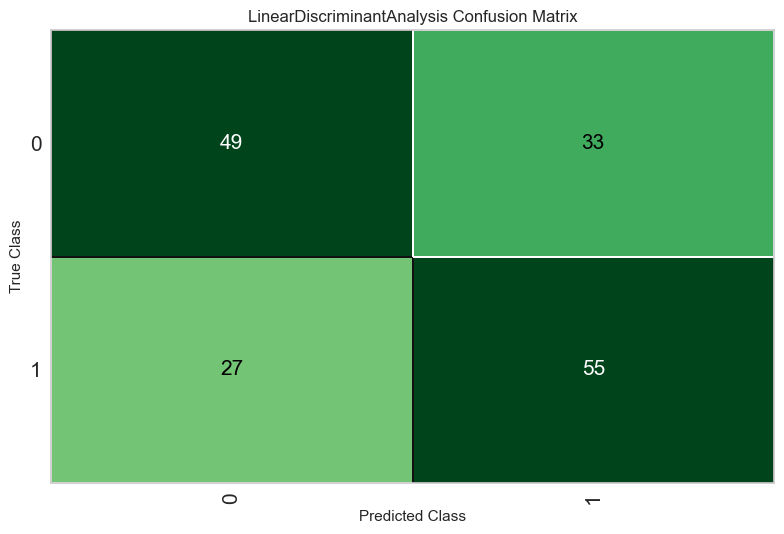

In [206]:
plot_model(estimator=model, plot='confusion_matrix')


In [207]:
predicts = predict_model(model,test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.6319,0.7117,0.7143,0.6132,0.6599,0.2637,0.2674
